In [94]:
from model.model import *
from processing_pipeline import *

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [95]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

In [97]:
train, test = train_test_split(dfs)

In [98]:
train.columns

Index(['session', 'mouse_name', 'trial_type', 'future_trial_type',
       'contrast_right', 'contrast_left', 'stim_loc', 'winning_stim',
       'mouse_resp', 'ideal_resp', 'future_acc', 'pres_acc', 'contrast_diff',
       'abs_contrast_diff', 'pres_difficulty', 'future_difficulty',
       'gocue_onset', 'resp_time', 'future_resp_time', 'latency',
       'future_latency', 'feedback_onset', 'feedback_type', 'prev_feedback'],
      dtype='object')

In [68]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [99]:
df = train

In [100]:
import seaborn as sns

def plots_2(df, var = "future_latency", features = ["pres_acc", "future_latency"], filter_name = None, filter_ = None, hue = None):
    df = df[df["trial_type"]!= "E"]
    df = df[df["future_trial_type"]!= "E"]
#     df = df[df["mouse_resp"]!= 0]
    if filter_name is not None:
        df = df[df[filter_name] == filter_]
    print(set(df["future_difficulty"]))
    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[var])  
                plt.xlabel(feature)
                plt.ylabel(var)
                plt.title("%s: %s Response Time"%(filter_name, filter_))
            else: 
                plt.figure()
                sns.scatterplot(feature, var, data = df, hue=hue, alpha= 0.7)
                plt.xlabel(feature)
                plt.ylabel(var)
                plt.title("%s: %s Response Time"%(filter_name, filter_))
                         

In [58]:
for i in range(39):
    print("session ", i)
    print(np.min(alldat[i]['gocue']))
    print(np.min(alldat[i]['response_time']))

session  0
0.48680763397413784
0.5843074453777604
session  1
0.4864054928859787
0.5682108526608545
session  2
0.48640761803847
0.5857100065359191
session  3
0.3973799848536146
0.5280655366015026
session  4
0.4005331095560223
0.5083060956027907
session  5
0.4003654706634734
0.4949078013951578
session  6
0.4002940636891026
0.5514852539473054
session  7
0.48880782308005166
0.5839892658963493
session  8
0.4904077633223096
0.5694611385691815
session  9
0.4892078351268765
0.5521847488997764
session  10
0.4884055919335992
0.5847157886171885
session  11
0.3968077446082816
0.47941449767444055
session  12
0.4000552538584543
0.5055177303122491
session  13
0.3982485672660232
0.5011834151572714
session  14
0.3976782365218696
0.4946784879016377
session  15
0.39777245598179434
0.504915826921831
session  16
0.39744640309695
0.5006253927650164
session  17
0.40292323620616344
0.4928565491806012
session  18
0.5960101592835372
0.7012967088068081
session  19
0.5952067798306615
0.7522238159684775
session  2

{0.5, 1.0, 0.25, 0.0, 0.75, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}


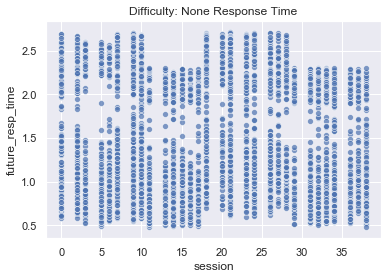

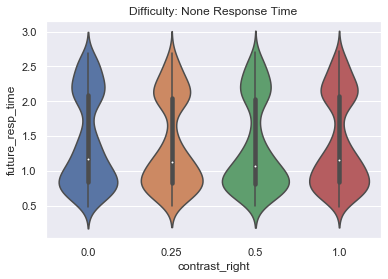

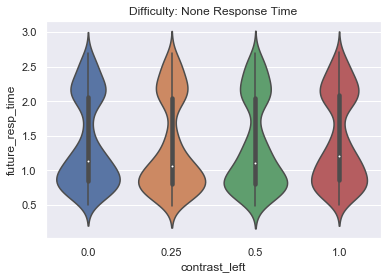

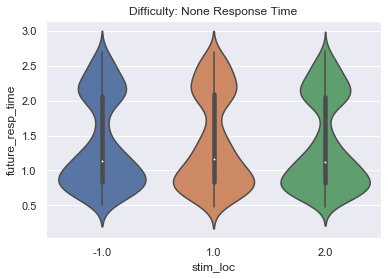

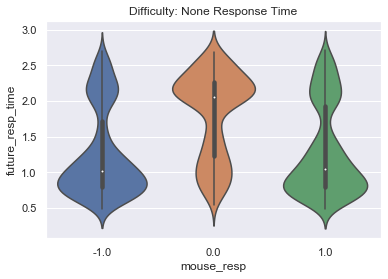

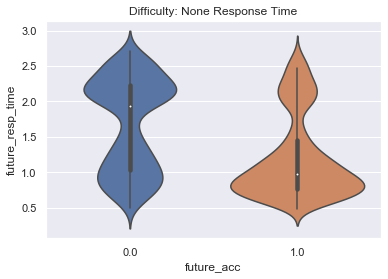

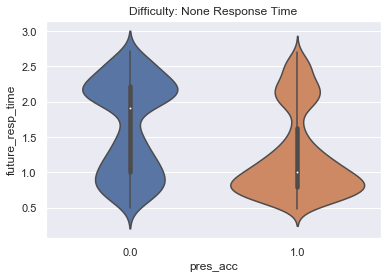

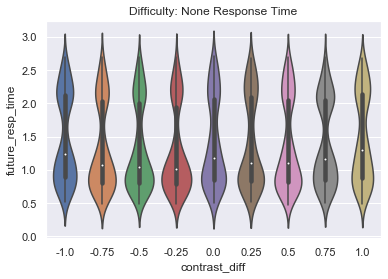

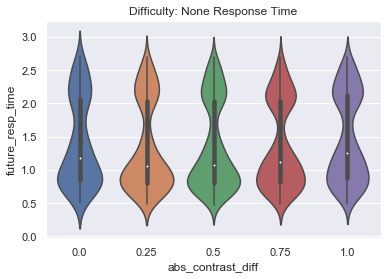

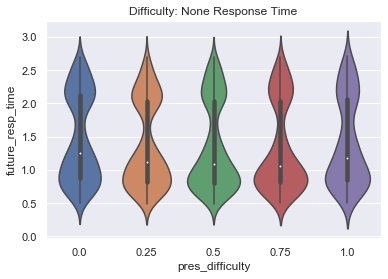

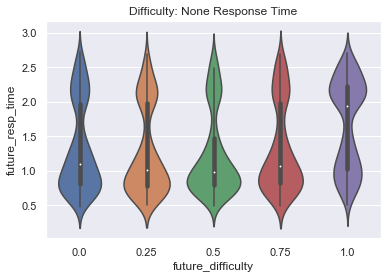

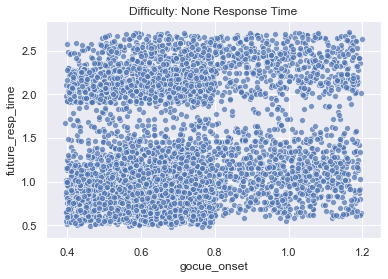

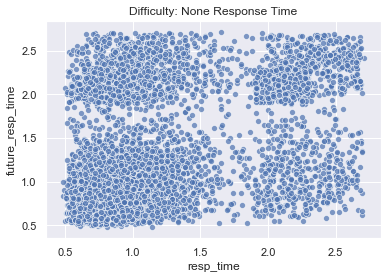

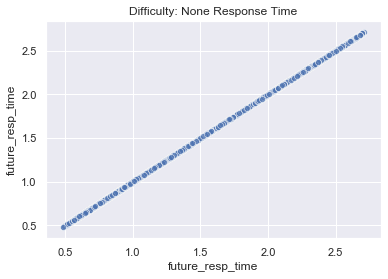

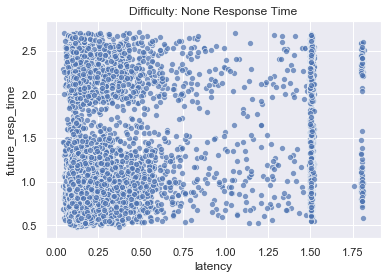

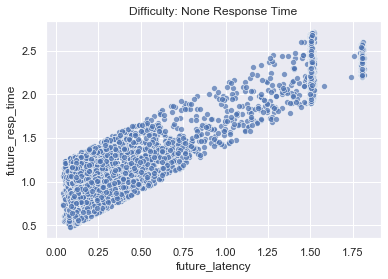

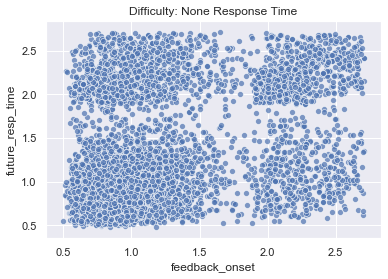

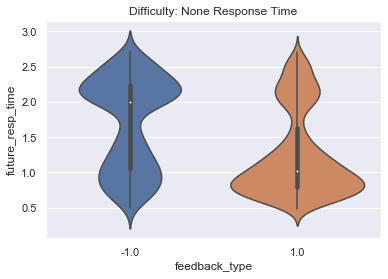

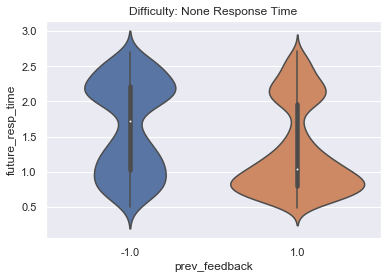

In [75]:
plots_2(df, features=df.columns)

In [ ]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plots_2(df, var = "future_latency", features = ["pres_acc"], filter_name = "future_difficulty", filter_= i)

{0.0}
{0.25}
{0.5}
{0.75}


/Users/jordanlei/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


{0.0}
{0.25}
{0.5}
{0.75}
{1.0}


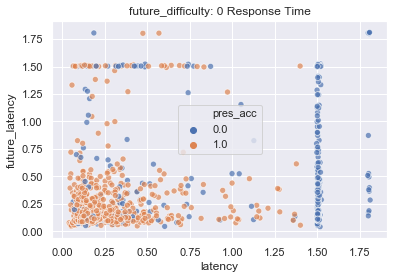

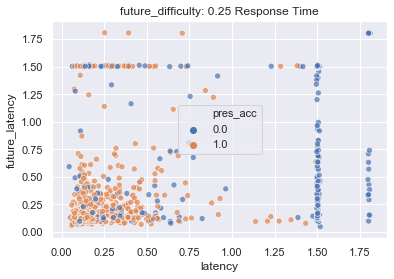

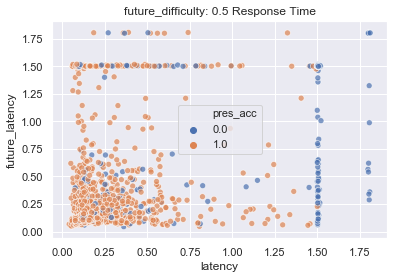

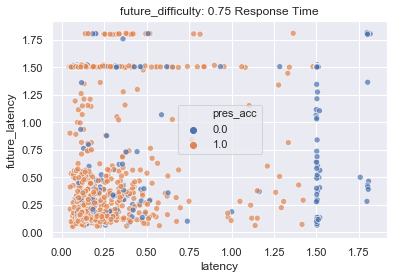

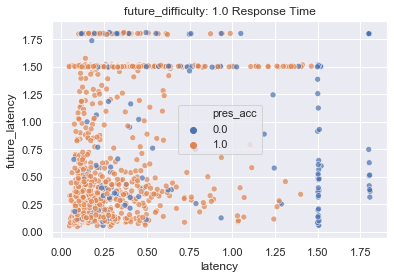

In [101]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plots_2(df, var = "future_latency", features = ["latency"], filter_name = "future_difficulty", filter_= i, hue= "pres_acc")

In [13]:
df.columns

Index(['session', 'mouse_name', 'trial_type', 'contrast_right',
       'contrast_left', 'stim_loc', 'winning_stim', 'mouse_resp', 'ideal_resp',
       'future_acc', 'pres_acc', 'contrast_diff', 'abs_contrast_diff',
       'pres_difficulty', 'future_difficulty', 'gocue_onset', 'resp_time',
       'future_resp_time', 'latency', 'feedback_onset', 'feedback_type',
       'prev_feedback'],
      dtype='object')

KeyboardInterrupt: 

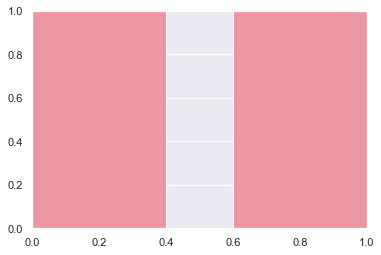

In [15]:
sns.set()
plt.figure()
sns.countplot(x = "resp_time", data = df)

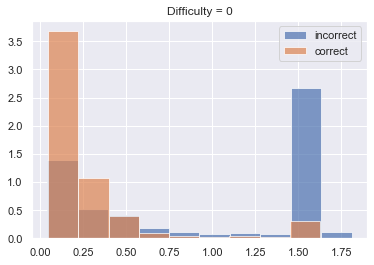

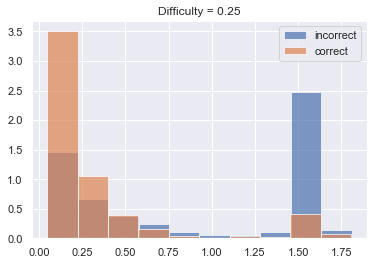

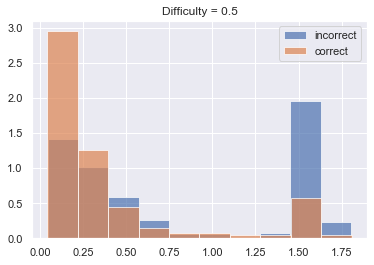

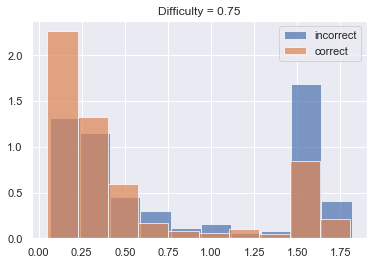

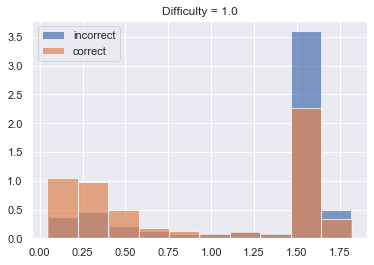

In [80]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plt.figure()

    pdf = df[df["future_difficulty"] == i]
    plt.hist(x = "future_latency", data = pdf[pdf["pres_acc"]==0], density = True, alpha = 0.7, label = "incorrect")
    plt.hist(x = "future_latency", data = pdf[pdf["pres_acc"]==1], density = True, alpha = 0.7, label = "correct")
    plt.legend()
    
    plt.title("Difficulty = %s"%i)

In [27]:
df["resp_time"].head()

0    1.150204
1    1.399503
2    0.949291
3    2.266802
4    0.816776
Name: resp_time, dtype: float64

In [28]:
df["resp_time_prev"].head()

0         NaN
1    1.150204
2    1.399503
3    0.949291
4    2.266802
Name: resp_time_prev, dtype: float64

In [52]:
df.columns

Index(['session', 'mouse_name', 'trial_type', 'contrast_right',
       'contrast_left', 'stim_loc', 'winning_stim', 'mouse_resp', 'ideal_resp',
       'prev_acc', 'pres_acc', 'contrast_diff', 'abs_contrast_diff',
       'pres_difficulty', 'future_difficulty', 'gocue_onset', 'resp_time',
       'future_resp_time', 'latency', 'feedback_onset', 'feedback_type',
       'prev_feedback'],
      dtype='object')